# Part 4: Feature Selection

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.tree import ExtraTreeClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score, confusion_matrix
import matplotlib.pyplot as plt
from imblearn.ensemble import EasyEnsembleClassifier


Bad key "text.kerning_factor" on line 4 in
C:\Users\sumai\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Load Dataset
Please see the link to know more about the dataset: https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease

In [2]:
df = pd.read_csv('preprocessed_kidney_disease.csv')
df.drop('Unnamed: 0', axis=1, inplace = True)
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,99.0,...,38.0,6000.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31.0,7500.0,5.2,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


## Split Input and Traget Variables

In [3]:
X = df.drop('classification', axis = 1) 
y = df['classification']

In [4]:
X.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia'],
      dtype='object')

## Train Test Split

In [5]:
# train_test_split is used to split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

print("Original shape of dataset: {}".format(df.shape))         # shape of original dataset
print("Shape of training dataset: {}".format(X_train.shape))      # shape of training dataset after split
print("Shape of testing dataset: {}".format(X_test.shape))        # shape of testing dataset after split

Original shape of dataset: (400, 25)
Shape of training dataset: (300, 24)
Shape of testing dataset: (100, 24)


## Defining all the functions

#### Writing a function that returns the evaluation metrics as a DataFrame

In [6]:
def model_comparison(models =[], model_names= []):
    
    acc = []
    prec = []
    recal = []
    f1_train = []
    f1_test = []
    roc_auc = []
    pr_auc = []
    
    for model in range(len(models)):
        clf = models[model]
        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test)
        y_hat_train = clf.predict(X_train) 
        pred_prob = clf.predict_proba(X_test)
        precision, recall, _ = precision_recall_curve(y_test, pred_prob[:, 1], pos_label=1)

        
        f1_train.append(f1_score(y_hat_train, y_train))
        f1_test.append(f1_score(y_hat, y_test))
        acc.append(accuracy_score(y_hat, y_test))
        prec.append(precision_score(y_hat, y_test))
        recal.append(recall_score(y_hat, y_test))
        roc_auc.append(roc_auc_score(y_test, y_hat))
        pr_auc.append(auc(recall, precision))
        
    compare = pd.DataFrame({'Algorithm' : model_names , 'ROC_AUC': roc_auc, 'PR_AUC': pr_auc, 'Precision': prec, 'Recall': recal, 'F1_Train': f1_train, 'F1_Test': f1_test, 'Accuracy' : acc, })
    return compare

#### Writing a function returns Macro and Weighted average of Recall Score

In [7]:
def macro_weighted(y_test, y_hat):
    
    rec = metrics.recall_score(y_test, y_hat)
    print ("Recall Score:", round(rec, 4))
    
    print ('.')

    rec_mac = metrics.recall_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of Recall Score:", round(rec_mac, 4))

    rec_wei = metrics.recall_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of Recall Score:", round(rec_wei, 4))

#### Writing a function returns Macro and Weighted average of Recall Score, Precision, and F1 Score

In [8]:
def macro_weighted_prec_rec(y_test, y_hat):
    
    rec = metrics.recall_score(y_test, y_hat)
    print ("Recall Score:", round(rec, 4))
    
    rec_mac = metrics.recall_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of Recall Score:", rec_mac)

    rec_wei = metrics.recall_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of Recall Score:", rec_wei)
    
    prec_mac = metrics.precision_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of Precision Score:", prec_mac)

    prec_wei = metrics.precision_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of Precision Score:", prec_wei)

    f1_mac = metrics.f1_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of F1 Score:", f1_mac)

    f1_wei = metrics.f1_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of F1 Score:", f1_wei)
    
    print ('.')
    
    acc = metrics.accuracy_score(y_test, y_hat)
    print ("Accuracy Score:", acc) 

#### ROC_AUC, Precision Recall AUC and the Confusion Matrices

In [9]:
def roc_pr_cm(models=[]):
    
    roc_auc = []
    pr_auc = []

    for model in range(len(models)):
        clf = models[model]
        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test)
        y_hat_train = clf.predict(X_train) 
    
        # predict probabilities
        pred_prob = clf.predict_proba(X_test)
    
        # Print the confusion matrix
        print('---------------------------------------------------------------')
        
        data = confusion_matrix(y_test, y_hat)
        df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
        df_cm.index.name = 'Actual'
        df_cm.columns.name = 'Predicted'
        plt.figure(figsize = (6, 4))
        #sns.set(font_scale=1.4) #for label size
        sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 12})# font size
        plt.show()
        
        tn, fp, fn, tp = confusion_matrix(y_test, y_hat).ravel()
        print ("TP: {}, FP: {}, TN: {}, FN: {}".format(tp, fp, tn, fn))

        # Print the precision and recall, among other metrics
        print('---------------------------------------------------------------')
        print(metrics.classification_report(y_test, y_hat, digits=3))
        
        print('---------------------------------------------------------------')
        
        macro_weighted(y_test, y_hat)
        
        print('---------------------------------------------------------------')
     
        fpr, tpr, thresh = roc_curve(y_test, pred_prob[:, 1], pos_label=1)
        roc_auc.append(roc_auc_score(y_test, y_hat))
    
        plt.style.use('seaborn')
        plt.figure(figsize=(8, 4))
        # plot roc curves
        plt.plot(fpr, tpr, label = models[model])
    
        plt.title('ROC curve where AUC= {}'.format(roc_auc[model]))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')

        plt.legend(loc='best')
        plt.savefig('ROC', dpi=300)
        plt.show();
    
        # calculate model precision-recall curve
        # precision, recall, _ = precision_recall_curve(y_hat , y_test)
        precision, recall, _ = precision_recall_curve(y_test, pred_prob[:, 1], pos_label=1)
        pr_auc.append(auc(recall, precision))
    
        # plot the model precision-recall curve
        plt.style.use('seaborn')
        plt.figure(figsize=(8, 4))
        plt.plot(recall, precision, marker='.', label = models[model])
        plt.title('Precision Recall curve AUC= {}'.format(pr_auc[model]))
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc='best')
        plt.show()

## (a) Feature selection using SelectFromModel and LassoCV

In [10]:
df = pd.read_csv('preprocessed_kidney_disease.csv')
df.drop('Unnamed: 0', axis=1, inplace = True)

X = df.drop('classification', axis = 1) 
y = df['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

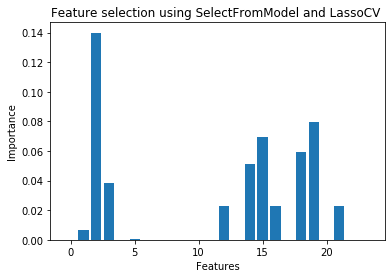

Selected features: ['specific_gravity' 'diabetes_mellitus' 'packed_cell_volume'
 'hypertension' 'haemoglobin' 'albumin' 'appetite' 'sodium'
 'white_blood_cell_count' 'blood_pressure' 'red_blood_cells' 'age'
 'coronary_artery_disease' 'red_blood_cell_count' 'serum_creatinine']


In [11]:
from sklearn.linear_model import LassoCV
import warnings
warnings.filterwarnings('ignore')

clf = LassoCV(random_state=42).fit(X_train, y_train)
importance = np.abs(clf.coef_)

idx_features = (-importance).argsort()[:15]
name_features = np.array(X.columns.to_list())[idx_features]

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title("Feature selection using SelectFromModel and LassoCV ")
plt.show()

print('Selected features: {}'.format(name_features))

In [12]:
df = pd.read_csv('preprocessed_kidney_disease.csv', usecols = ['specific_gravity', 'diabetes_mellitus', 'packed_cell_volume',
 'hypertension', 'haemoglobin', 'albumin', 'appetite', 'sodium',
 'white_blood_cell_count', 'blood_pressure', 'red_blood_cells', 'age',
 'coronary_artery_disease', 'red_blood_cell_count', 'serum_creatinine', 'classification'])

X = df.drop('classification', axis = 1) 
y = df['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
models = [RandomForestClassifier(random_state = 42)]
model_names=['RandomForestClassifier']
model_comparison(models, model_names)

,Algorithm,ROC_AUC,PR_AUC,Precision,Recall,F1_Train,F1_Test,Accuracy
0,RandomForestClassifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0


---------------------------------------------------------------


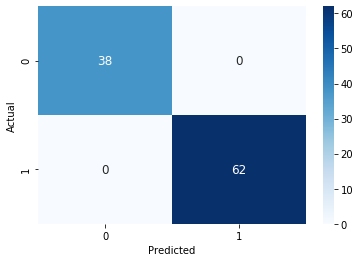

TP: 62, FP: 0, TN: 38, FN: 0
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        38
           1      1.000     1.000     1.000        62

    accuracy                          1.000       100
   macro avg      1.000     1.000     1.000       100
weighted avg      1.000     1.000     1.000       100

---------------------------------------------------------------
Recall Score: 1.0
.
Macro Average of Recall Score: 1.0
Weighted Average of Recall Score: 1.0
---------------------------------------------------------------


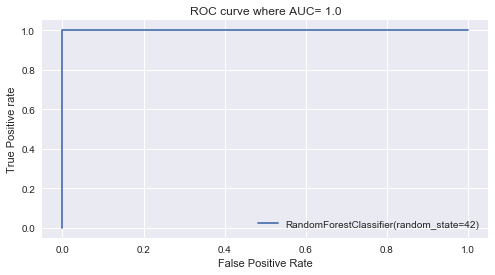

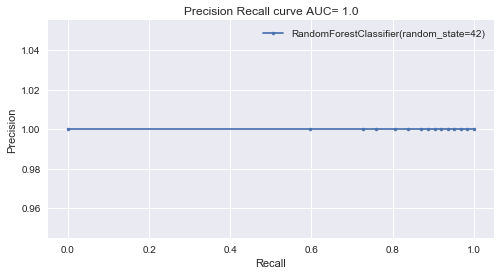

In [14]:
models = [RandomForestClassifier(random_state = 42)]
roc_pr_cm(models)

## (b) Feature Selection: RandomForest Recursive Feature Elimination

In [15]:
df = pd.read_csv('preprocessed_kidney_disease.csv')
df.drop('Unnamed: 0', axis=1, inplace = True)

X = df.drop('classification', axis = 1) 
y = df['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### sklearn.feature_selection.RFE

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_estimators=100, criterion='entropy', max_depth=20, max_features='auto')

from sklearn.feature_selection import RFE
rfe = RFE(estimator=rf, n_features_to_select=15, step = 1)

fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)

print('-----------------------------------------------------------------------')

print("Selected Features: %s" % fit.support_)

print('-----------------------------------------------------------------------')

print("Feature Ranking: %s" % fit.ranking_)

Num Features: 15
-----------------------------------------------------------------------
Selected Features: [False False  True  True False False False False False  True  True  True
  True  True  True  True  True  True  True  True False  True  True False]
-----------------------------------------------------------------------
Feature Ranking: [ 3  4  1  1  2  6  5  8  9  1  1  1  1  1  1  1  1  1  1  1 10  1  1  7]


In [17]:
selected_rfe_features = pd.DataFrame({'Feature':list(X.columns),
                                      'Ranking':rfe.ranking_})

selected_rfe_features.sort_values(by='Ranking')
selected_rfe_features = selected_rfe_features[selected_rfe_features['Ranking'] == 1]
top15 = selected_rfe_features.nlargest(15,'Ranking')
top15

,Feature,Ranking
2,specific_gravity,1
3,albumin,1
9,blood_glucose_random,1
10,blood_urea,1
11,serum_creatinine,1
12,sodium,1
13,potassium,1
14,haemoglobin,1
15,packed_cell_volume,1
16,white_blood_cell_count,1


In [18]:
top15.Feature.values

array(['specific_gravity', 'albumin', 'blood_glucose_random',
       'blood_urea', 'serum_creatinine', 'sodium', 'potassium',
       'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count',
       'red_blood_cell_count', 'hypertension', 'diabetes_mellitus',
       'appetite', 'pedal_edema'], dtype=object)

In [19]:
df = pd.read_csv('preprocessed_kidney_disease.csv', usecols = ['specific_gravity', 'albumin', 'blood_glucose_random',
       'blood_urea', 'serum_creatinine', 'sodium', 'potassium',
       'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count',
       'red_blood_cell_count', 'hypertension', 'diabetes_mellitus',
       'appetite', 'pedal_edema', 'classification'])

X = df.drop('classification', axis = 1) 
y = df['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
models = [RandomForestClassifier(random_state = 42)]
model_names=['RandomForestClassifier']
model_comparison(models, model_names)

,Algorithm,ROC_AUC,PR_AUC,Precision,Recall,F1_Train,F1_Test,Accuracy
0,RandomForestClassifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0


---------------------------------------------------------------


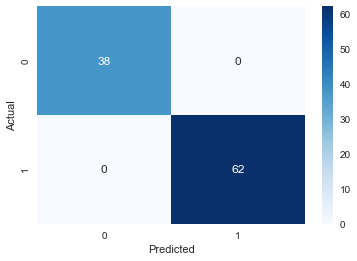

TP: 62, FP: 0, TN: 38, FN: 0
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        38
           1      1.000     1.000     1.000        62

    accuracy                          1.000       100
   macro avg      1.000     1.000     1.000       100
weighted avg      1.000     1.000     1.000       100

---------------------------------------------------------------
Recall Score: 1.0
.
Macro Average of Recall Score: 1.0
Weighted Average of Recall Score: 1.0
---------------------------------------------------------------


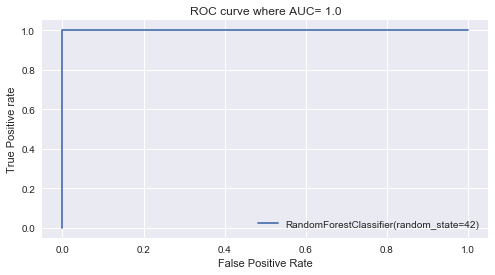

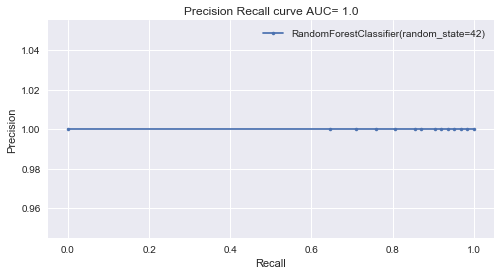

In [21]:
models = [RandomForestClassifier(random_state = 42)]
roc_pr_cm(models)

## (c) Feature Selection: RandomForest Boruta

In [22]:
df = pd.read_csv('preprocessed_kidney_disease.csv')
df.drop('Unnamed: 0', axis=1, inplace = True)

X = df.drop('classification', axis = 1) 
y = df['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5, random_state=42)
rf.fit(X_train, y_train)

from boruta import BorutaPy
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
boruta_selector.fit(np.array(X_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	18
Tentative: 	3
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	18
Tentative: 	3
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	18
Tentative: 	3
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	18
Tentative: 	3
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	18
Tentative: 	3
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	18
Tentative: 	3
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	18
Tentative: 	3
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	18
Tentative: 	3
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	3
I

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=129, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x22C26BDDD08),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x22C26BDDD08, verbose=2)

In [24]:
# check selected features
print("Selected Features: ", boruta_selector.support_)

print ('----------------------------------------------------------------------------')
 
# check ranking of features
print("Ranking: ", boruta_selector.ranking_)

print ('----------------------------------------------------------------------------')

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [ True  True  True  True  True False  True False False  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True]
----------------------------------------------------------------------------
Ranking:  [1 1 1 1 1 2 1 3 5 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1]
----------------------------------------------------------------------------
No. of significant features:  20


In [25]:
green_area = X.columns[boruta_selector.support_].to_list()
blue_area = X.columns[boruta_selector.support_weak_].to_list()

print ('features in the green area:', green_area)

print ('============================================================================================================================================================================================================')

print ('features in the blue area:', blue_area)

features in the green area: ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'pus_cell', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'appetite', 'pedal_edema', 'anemia']
features in the blue area: ['red_blood_cells']


In [26]:
# Let's visualise it better in the form of a table
selected_boruta_features = pd.DataFrame({'Feature':list(X.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_boruta_features.sort_values(by='Ranking')
selected_boruta_features = selected_boruta_features[selected_boruta_features['Ranking'] < 16]
top15 = selected_boruta_features.nsmallest(15,'Ranking')
top15 

,Feature,Ranking
0,age,1
1,blood_pressure,1
2,specific_gravity,1
3,albumin,1
4,sugar,1
6,pus_cell,1
9,blood_glucose_random,1
10,blood_urea,1
11,serum_creatinine,1
12,sodium,1


In [27]:
top15.Feature.values

array(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'pus_cell', 'blood_glucose_random', 'blood_urea',
       'serum_creatinine', 'sodium', 'potassium', 'haemoglobin',
       'packed_cell_volume', 'white_blood_cell_count',
       'red_blood_cell_count'], dtype=object)

In [28]:
df = pd.read_csv('preprocessed_kidney_disease.csv', usecols = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'pus_cell', 'blood_glucose_random', 'blood_urea',
       'serum_creatinine', 'sodium', 'potassium', 'haemoglobin',
       'packed_cell_volume', 'white_blood_cell_count',
       'red_blood_cell_count', 'classification'])

X = df.drop('classification', axis = 1) 
y = df['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
models = [RandomForestClassifier(random_state = 42)]
model_names=['RandomForestClassifier']
model_comparison(models, model_names)

,Algorithm,ROC_AUC,PR_AUC,Precision,Recall,F1_Train,F1_Test,Accuracy
0,RandomForestClassifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0


---------------------------------------------------------------


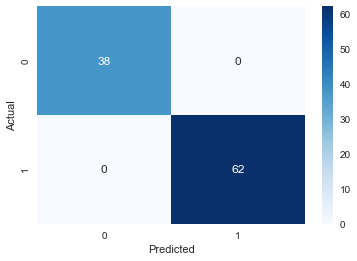

TP: 62, FP: 0, TN: 38, FN: 0
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        38
           1      1.000     1.000     1.000        62

    accuracy                          1.000       100
   macro avg      1.000     1.000     1.000       100
weighted avg      1.000     1.000     1.000       100

---------------------------------------------------------------
Recall Score: 1.0
.
Macro Average of Recall Score: 1.0
Weighted Average of Recall Score: 1.0
---------------------------------------------------------------


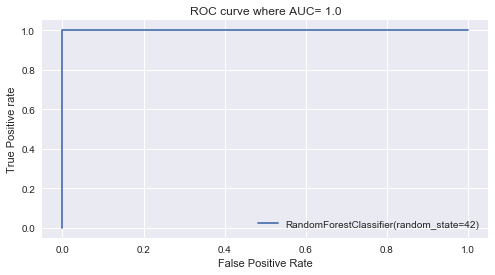

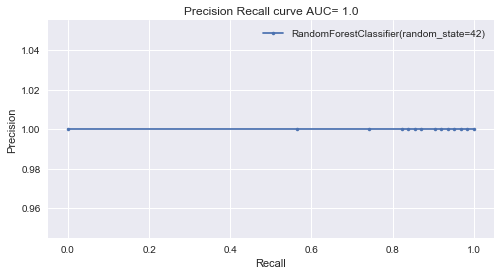

In [30]:
models = [RandomForestClassifier(random_state = 42)]
roc_pr_cm(models)

## (d) Permutation Feature Importance

In [31]:
df = pd.read_csv('preprocessed_kidney_disease.csv')
df.drop('Unnamed: 0', axis=1, inplace = True)

X = df.drop('classification', axis = 1) 
y = df['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00480
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00560
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00400
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000


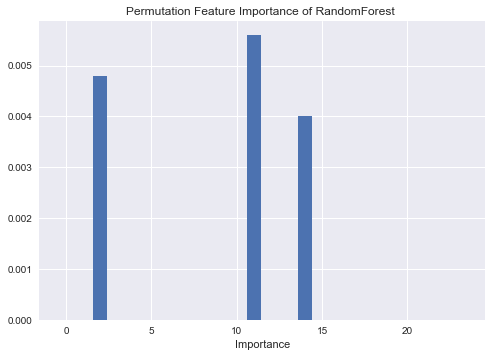

In [32]:
from sklearn.inspection import permutation_importance

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='recall')
# get importance
importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

    # plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Features')
plt.xlabel('Importance')
plt.title("Permutation Feature Importance of RandomForest ")
plt.show()

In [33]:
import warnings
warnings.filterwarnings('ignore')

idx_features = (-importance).argsort()[:15]
name_features = np.array(X_train.columns.to_list())[idx_features]
print('Selected features: {}'.format(name_features))

Selected features: ['serum_creatinine' 'specific_gravity' 'haemoglobin' 'appetite'
 'coronary_artery_disease' 'diabetes_mellitus' 'hypertension'
 'red_blood_cell_count' 'white_blood_cell_count' 'packed_cell_volume'
 'potassium' 'sodium' 'age' 'blood_urea' 'blood_glucose_random']


In [34]:
df = pd.read_csv('preprocessed_kidney_disease.csv', usecols = ['serum_creatinine', 'specific_gravity', 'haemoglobin', 'appetite',
 'coronary_artery_disease', 'diabetes_mellitus', 'hypertension',
 'red_blood_cell_count', 'white_blood_cell_count', 'packed_cell_volume',
 'potassium', 'sodium', 'age', 'blood_urea', 'blood_glucose_random' , 'classification'])

X = df.drop('classification', axis = 1) 
y = df['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
models = [RandomForestClassifier(random_state = 42)]
model_names=['RandomForestClassifier']
model_comparison(models, model_names)

,Algorithm,ROC_AUC,PR_AUC,Precision,Recall,F1_Train,F1_Test,Accuracy
0,RandomForestClassifier,0.991935,0.999742,0.983871,1.0,1.0,0.99187,0.99


---------------------------------------------------------------


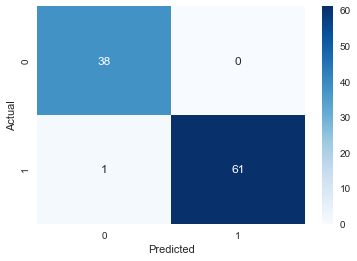

TP: 61, FP: 0, TN: 38, FN: 1
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.974     1.000     0.987        38
           1      1.000     0.984     0.992        62

    accuracy                          0.990       100
   macro avg      0.987     0.992     0.989       100
weighted avg      0.990     0.990     0.990       100

---------------------------------------------------------------
Recall Score: 0.9839
.
Macro Average of Recall Score: 0.9919
Weighted Average of Recall Score: 0.99
---------------------------------------------------------------


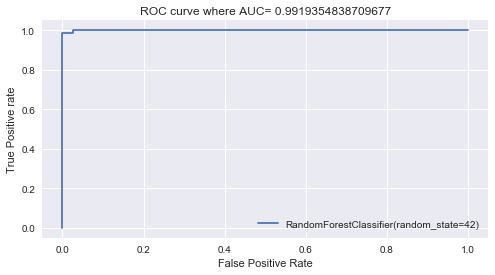

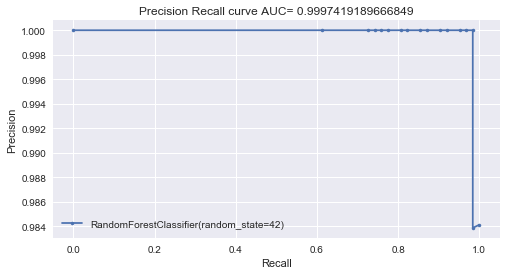

In [36]:
models = [RandomForestClassifier(random_state = 42)]
roc_pr_cm(models)

## (e) Feature Importance using RandomForestClassifier

In [37]:
df = pd.read_csv('preprocessed_kidney_disease.csv')
df.drop('Unnamed: 0', axis=1, inplace = True)

X = df.drop('classification', axis = 1) 
y = df['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

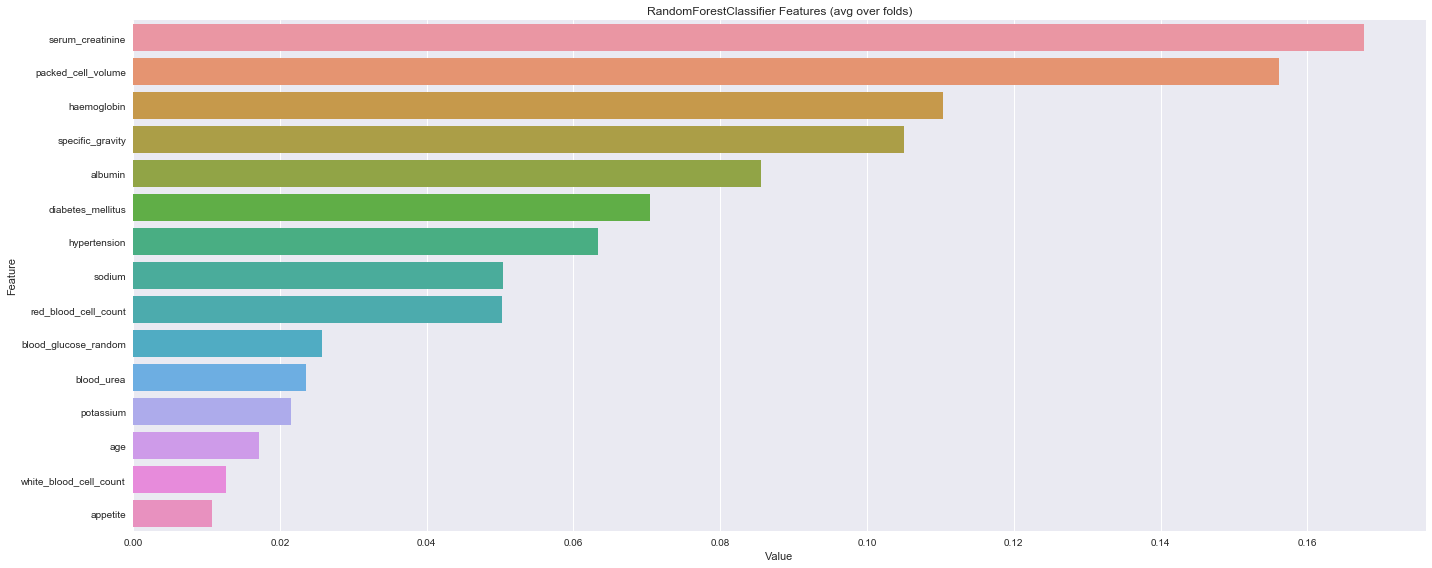

In [38]:
model = RandomForestClassifier(random_state=42)
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_

feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_, X.columns), reverse=True), columns=['Value','Feature'])
feature_imp

top15 = feature_imp.nlargest(15,'Value')

plt.figure(figsize=(20, 8))
sns.barplot(x="Value", y="Feature", data=top15.sort_values(by="Value", ascending=False))
plt.title('RandomForestClassifier Features (avg over folds)')
plt.tight_layout()
plt.show()

In [39]:
rf_features = top15.Feature.to_list()
rf_features

['serum_creatinine',
 'packed_cell_volume',
 'haemoglobin',
 'specific_gravity',
 'albumin',
 'diabetes_mellitus',
 'hypertension',
 'sodium',
 'red_blood_cell_count',
 'blood_glucose_random',
 'blood_urea',
 'potassium',
 'age',
 'white_blood_cell_count',
 'appetite']

In [40]:
df = pd.read_csv('preprocessed_kidney_disease.csv', usecols = ['serum_creatinine',
 'packed_cell_volume',
 'haemoglobin',
 'specific_gravity',
 'albumin',
 'diabetes_mellitus',
 'hypertension',
 'sodium',
 'red_blood_cell_count',
 'blood_glucose_random',
 'blood_urea',
 'potassium',
 'age',
 'white_blood_cell_count',
 'appetite', 'classification'])

X = df.drop('classification', axis = 1) 
y = df['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
models = [RandomForestClassifier(random_state = 42)]
model_names=['RandomForestClassifier']
model_comparison(models, model_names)

,Algorithm,ROC_AUC,PR_AUC,Precision,Recall,F1_Train,F1_Test,Accuracy
0,RandomForestClassifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0


---------------------------------------------------------------


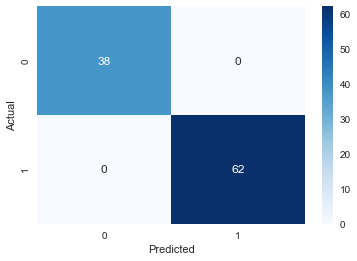

TP: 62, FP: 0, TN: 38, FN: 0
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        38
           1      1.000     1.000     1.000        62

    accuracy                          1.000       100
   macro avg      1.000     1.000     1.000       100
weighted avg      1.000     1.000     1.000       100

---------------------------------------------------------------
Recall Score: 1.0
.
Macro Average of Recall Score: 1.0
Weighted Average of Recall Score: 1.0
---------------------------------------------------------------


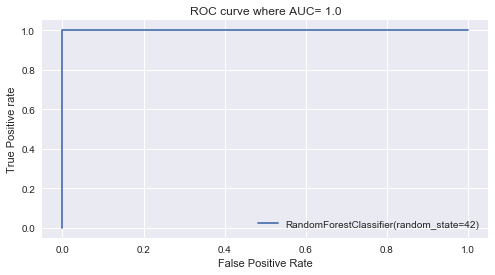

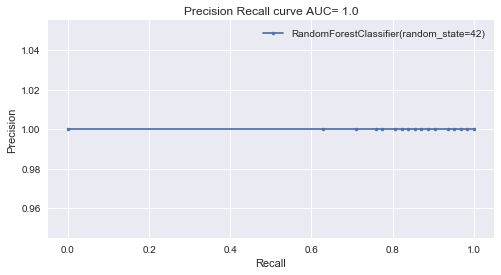

In [42]:
models = [RandomForestClassifier(random_state = 42)]
roc_pr_cm(models)

## (f) Feature Importance using XGBoostClassifier

In [43]:
df = pd.read_csv('preprocessed_kidney_disease.csv')
df.drop('Unnamed: 0', axis=1, inplace = True)

X = df.drop('classification', axis = 1) 
y = df['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

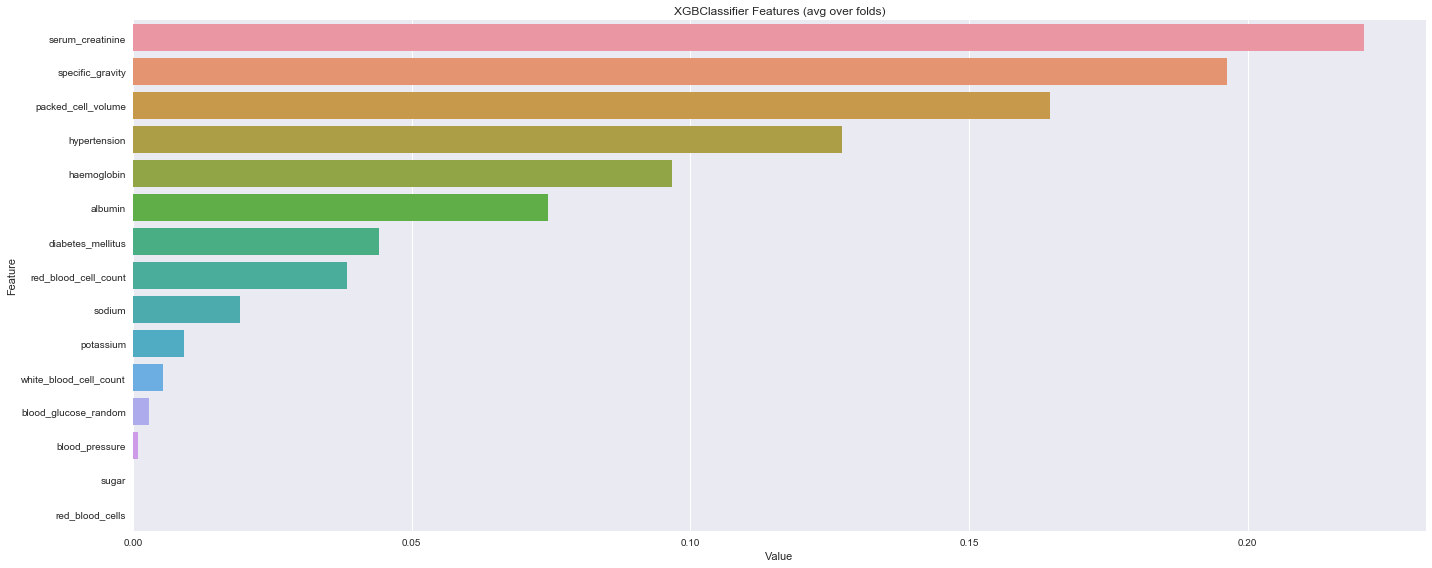

In [44]:
model = XGBClassifier(random_state=42)
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_

feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_, X.columns), reverse=True), columns=['Value','Feature'])
feature_imp

top15 = feature_imp.nlargest(15,'Value')

plt.figure(figsize=(20, 8))
sns.barplot(x="Value", y="Feature", data=top15.sort_values(by="Value", ascending=False))
plt.title('XGBClassifier Features (avg over folds)')
plt.tight_layout()
plt.show()

In [45]:
xgb_features = top15.Feature.to_list()
xgb_features

['serum_creatinine',
 'specific_gravity',
 'packed_cell_volume',
 'hypertension',
 'haemoglobin',
 'albumin',
 'diabetes_mellitus',
 'red_blood_cell_count',
 'sodium',
 'potassium',
 'white_blood_cell_count',
 'blood_glucose_random',
 'blood_pressure',
 'sugar',
 'red_blood_cells']

In [46]:
df = pd.read_csv('preprocessed_kidney_disease.csv', usecols = ['serum_creatinine',
 'specific_gravity',
 'packed_cell_volume',
 'hypertension',
 'haemoglobin',
 'albumin',
 'diabetes_mellitus',
 'red_blood_cell_count',
 'sodium',
 'potassium',
 'white_blood_cell_count',
 'blood_glucose_random',
 'blood_pressure',
 'sugar',
 'red_blood_cells', 'classification'])

X = df.drop('classification', axis = 1) 
y = df['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
models = [RandomForestClassifier(random_state = 42)]
model_names=['RandomForestClassifier']
model_comparison(models, model_names)

,Algorithm,ROC_AUC,PR_AUC,Precision,Recall,F1_Train,F1_Test,Accuracy
0,RandomForestClassifier,0.991935,1.0,0.983871,1.0,1.0,0.99187,0.99


---------------------------------------------------------------


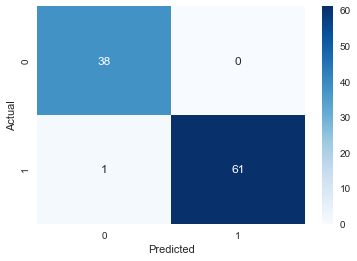

TP: 61, FP: 0, TN: 38, FN: 1
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.974     1.000     0.987        38
           1      1.000     0.984     0.992        62

    accuracy                          0.990       100
   macro avg      0.987     0.992     0.989       100
weighted avg      0.990     0.990     0.990       100

---------------------------------------------------------------
Recall Score: 0.9839
.
Macro Average of Recall Score: 0.9919
Weighted Average of Recall Score: 0.99
---------------------------------------------------------------


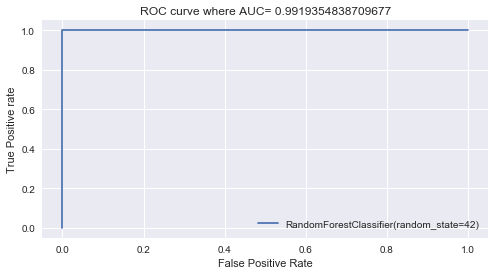

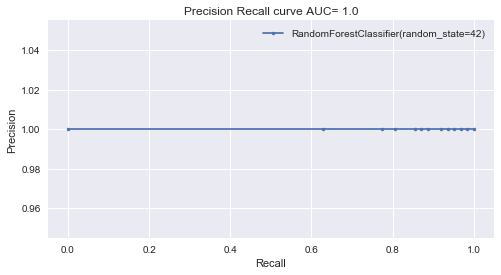

In [48]:
models = [RandomForestClassifier(random_state = 42)]
roc_pr_cm(models)

## Conclusion

#### (a) Feature selection using SelectFromModel and LassoCV
- Recall Score: 1.0
- Macro Average of Recall Score: 1.0
- Weighted Average of Recall Score: 1.0

#### (b) Feature Selection: RandomForest Recursive Feature Elimination
- Recall Score: 1.0
- Macro Average of Recall Score: 1.0
- Weighted Average of Recall Score: 1.0

#### (c) Feature Selection: RandomForest Boruta
- Recall Score: 1.0
- Macro Average of Recall Score: 1.0
- Weighted Average of Recall Score: 1.0

#### (d) Permutation Feature Importance
- Recall Score: 0.9839
- Macro Average of Recall Score: 0.9919
- Weighted Average of Recall Score: 0.99

#### (e) Feature Importance using RandomForestClassifier
- Recall Score: 1.0
- Macro Average of Recall Score: 1.0
- Weighted Average of Recall Score: 1.0

#### (f) Feature Importance using XGBoostClassifier
- Recall Score: 0.9839
- Macro Average of Recall Score: 0.9919
- Weighted Average of Recall Score: 0.99

### Selected Features: (e) Feature Importance using RandomForestClassifier
['serum_creatinine',
 'packed_cell_volume',
 'haemoglobin',
 'specific_gravity',
 'albumin',
 'diabetes_mellitus',
 'hypertension',
 'sodium',
 'red_blood_cell_count',
 'blood_glucose_random',
 'blood_urea',
 'potassium',
 'age',
 'white_blood_cell_count',
 'appetite', 'classification']